<a href="https://colab.research.google.com/github/bekasberkisah/tugasfundamentaldataanalyst/blob/main/Klasifikasi_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [4]:
# Memuat dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df = df.drop('PassengerId', axis=1)
print(df.shape)

(891, 11)


In [6]:
df.loc[:, df.isna().any()]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


In [7]:
new_df = df.dropna(axis=1) # hapus fitur dengan data kosong
print(new_df.shape)

(891, 8)


In [8]:
s = (new_df.dtypes == 'object')
object_cols = list(s[s].index)
print("Variabel/fitur dengan bertipe Categorical:")
print(object_cols)
print('\n Jumlah Variabel/fitur dengan bertipe Categorical ',
len(object_cols))

Variabel/fitur dengan bertipe Categorical:
['Name', 'Sex', 'Ticket']

 Jumlah Variabel/fitur dengan bertipe Categorical  3


In [10]:
OH_encoder = OneHotEncoder(sparse_output=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_df[object_cols]))
OH_cols.index = new_df.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [13]:
X = df_final.drop('Survived', axis=1) #data fitur
y = df_final['Survived'] #data target

In [14]:
# Standarisasi fitur [lihat materi minggu ke-1]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

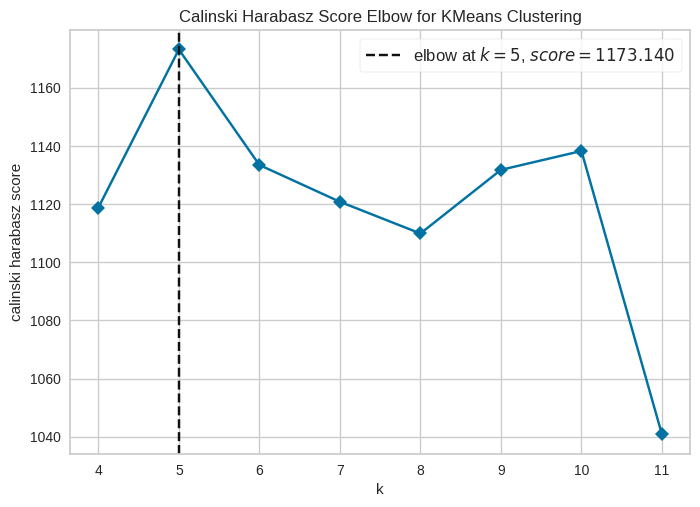

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Apply PCA before clustering
pca = PCA(n_components=2)  # Example: reducing to 2 components
X_pca = pca.fit_transform(X_scaled)

# Inisiasi model cluster dan visualisasi
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12),
metric='calinski_harabasz', timings=False)
visualizer.fit(X_pca) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

In [17]:
# Menerapkan PCA dengan 4 komponen
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

In [19]:
# Menampilkan komponen utama
components = pca.components_
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.sum(explained_variance)
print('\nVariansi yang Dijelaskan oleh Setiap Komponen Utama:')
print(explained_variance)
print('\nKumulatif Variansi yang Dijelaskan oleh Setiap Komponen Utama:')
print(cumulative_explained_variance)


Variansi yang Dijelaskan oleh Setiap Komponen Utama:
[0.0026842  0.00209185 0.00196806 0.00131753]

Kumulatif Variansi yang Dijelaskan oleh Setiap Komponen Utama:
0.008061643457476649


In [20]:
components_df = pd.DataFrame(components, columns=X.columns,
index=[f'PC{i+1}' for i in range(4)])
explained_variance_df = pd.DataFrame(explained_variance, index=[f'PC{i+1}'
for i in range(4)], columns=['Explained Variance'])
print('\nKomponen Utama dalam DataFrame:')
print(components_df)


Komponen Utama dalam DataFrame:
       Pclass     SibSp     Parch      Fare  Name_Abbing, Mr. Anthony  \
PC1 -0.190630  0.192355  0.258540  0.272689                 -0.016739   
PC2  0.410844  0.248909  0.200367 -0.313343                  0.007015   
PC3 -0.064647  0.326867  0.256460  0.207198                 -0.002959   
PC4  0.096431  0.047409 -0.104541  0.104196                  0.008322   

     Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
PC1                         -0.004389                               0.013241   
PC2                          0.019284                               0.024381   
PC3                          0.011231                              -0.005582   
PC4                         -0.012332                              -0.011800   

     Name_Abelson, Mr. Samuel  Name_Abelson, Mrs. Samuel (Hannah Wizosky)  \
PC1                 -0.004942                                    0.012679   
PC2                 -0.015103                 

In [22]:
for i in range(4):
    print(f'\nFitur dan Nilai yang paling berkontribusi pada PC{i+1}:')
    print(components_df.iloc[i].sort_values(ascending=False))


Fitur dan Nilai yang paling berkontribusi pada PC1:
Sex_female       0.406028
Fare             0.272689
Parch            0.258540
SibSp            0.192355
Ticket_19950     0.085043
                   ...   
Ticket_239853   -0.024163
Ticket_1601     -0.032684
Ticket_LINE     -0.034260
Pclass          -0.190630
Sex_male        -0.406028
Name: PC1, Length: 1578, dtype: float64

Fitur dan Nilai yang paling berkontribusi pada PC2:
Pclass                                     0.410844
SibSp                                      0.248909
Parch                                      0.200367
Ticket_CA. 2343                            0.143420
Ticket_347082                              0.113435
                                             ...   
Name_Cardeza, Mr. Thomas Drake Martinez   -0.094170
Name_Lesurer, Mr. Gustave J               -0.097549
Ticket_PC 17757                           -0.097673
Ticket_PC 17755                           -0.164318
Fare                                      -0.313

In [23]:
print('\nFitur yang paling berkontribusi pada PC1:')
pc1_loadings = components_df.iloc[1].sort_values(ascending=False)
print("Loadings untuk PC1:")
print(pc1_loadings)


Fitur yang paling berkontribusi pada PC1:
Loadings untuk PC1:
Pclass                                     0.410844
SibSp                                      0.248909
Parch                                      0.200367
Ticket_CA. 2343                            0.143420
Ticket_347082                              0.113435
                                             ...   
Name_Cardeza, Mr. Thomas Drake Martinez   -0.094170
Name_Lesurer, Mr. Gustave J               -0.097549
Ticket_PC 17757                           -0.097673
Ticket_PC 17755                           -0.164318
Fare                                      -0.313343
Name: PC2, Length: 1578, dtype: float64


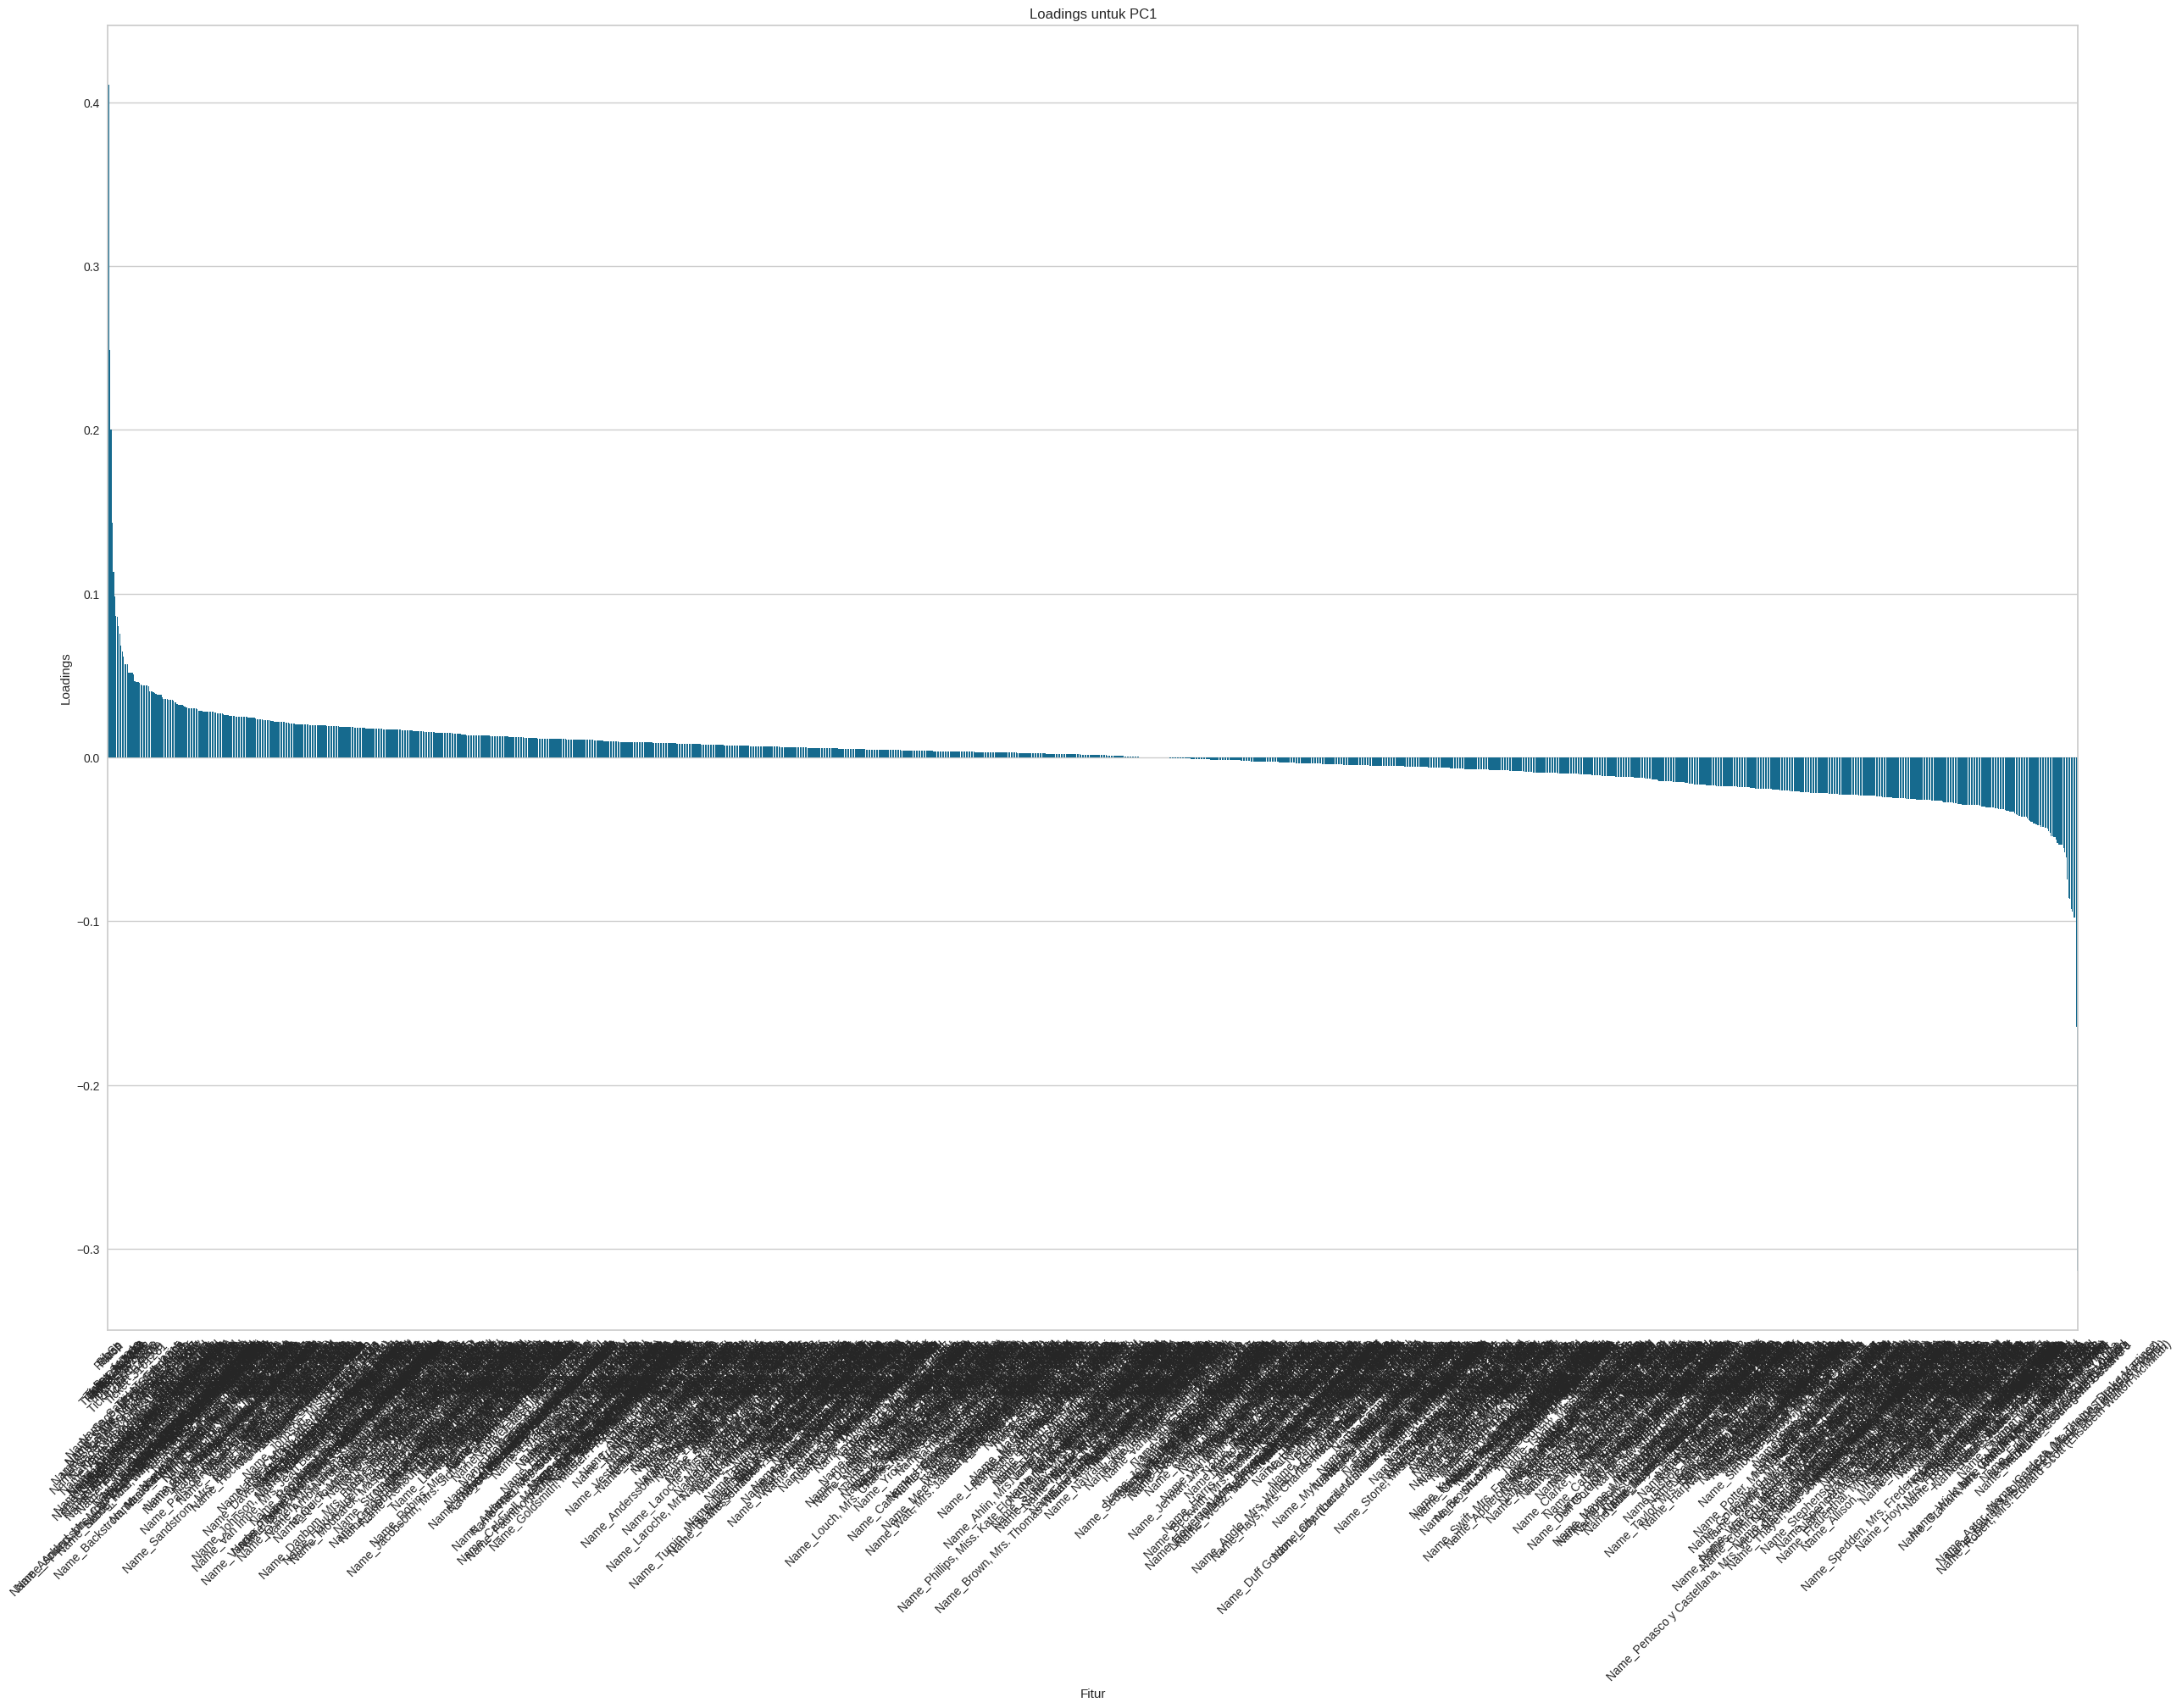

In [24]:
import seaborn as sns
plt.figure(figsize=(30, 20))
sns.barplot(x=pc1_loadings.index, y=pc1_loadings.values)
plt.xlabel('Fitur')
plt.ylabel('Loadings')
plt.title('Loadings untuk PC1')
plt.xticks(rotation=45)
plt.show()

In [26]:
# Menetapkan threshold untuk loadings
# Threshold ini menjadi batas pemilihan fitur dengan kontribusi tertinggi.
# Fitur yang memiliki nilai loadings di atas atau di bawah threshold tertentu dapat dianggap penting.
threshold = 0.1 # Misalnya, threshold ini bisa disesuaikan
# Memilih fitur yang kontribusinya lebih besar dari threshold
important_features_pc1 = pc1_loadings[pc1_loadings.abs() >
threshold].index.tolist()
important_features_pc1_count = len(important_features_pc1)
print("Fitur penting untuk berdasarkan threshold:")
print(important_features_pc1)
print("\nJumlah Fitur penting untuk berdasarkan threshold:")
print(important_features_pc1_count)

Fitur penting untuk berdasarkan threshold:
['Pclass', 'SibSp', 'Parch', 'Ticket_CA. 2343', 'Ticket_347082', 'Ticket_PC 17755', 'Fare']

Jumlah Fitur penting untuk berdasarkan threshold:
7


In [28]:
new_X = X[important_features_pc1]
print(new_X.shape)
new_X.head()

(891, 7)


,Pclass,SibSp,Parch,Ticket_CA. 2343,Ticket_347082,Ticket_PC 17755,Fare
0,3,1,0,0.0,0.0,0.0,7.2500
1,1,1,0,0.0,0.0,0.0,71.2833
2,3,0,0,0.0,0.0,0.0,7.9250
3,1,1,0,0.0,0.0,0.0,53.1000
4,3,0,0,0.0,0.0,0.0,8.0500
